In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mental_disease_stastics = pd.read_csv('시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv', encoding='euc-kr')

# mental_disease_stastics.head()

df1 = mental_disease_stastics[['진료년도','상별구분','연령구분', '환자수']].groupby(['연령구분','상별구분','진료년도']).sum()
subset1 = df1.query('(연령구분 == "0~9세") & (상별구분 == "ADHD")')
subset2 = df1.query('(연령구분 == "10~19세") & (상별구분 == "ADHD")')

tmp= pd.merge(subset1,subset2, on=["상별구분","진료년도"])
tmp['합계'] = tmp['환자수_x'] + tmp['환자수_y']
tmp.index = tmp.index.droplevel(0)
tmp

,환자수_x,환자수_y,합계
진료년도,,,
2018,20327,32910,53237
2019,24888,36433,61321
2020,24382,37687,62069
2021,32190,44533,76723
2022,41616,58259,99875


상관계수: 0.7949986280313011


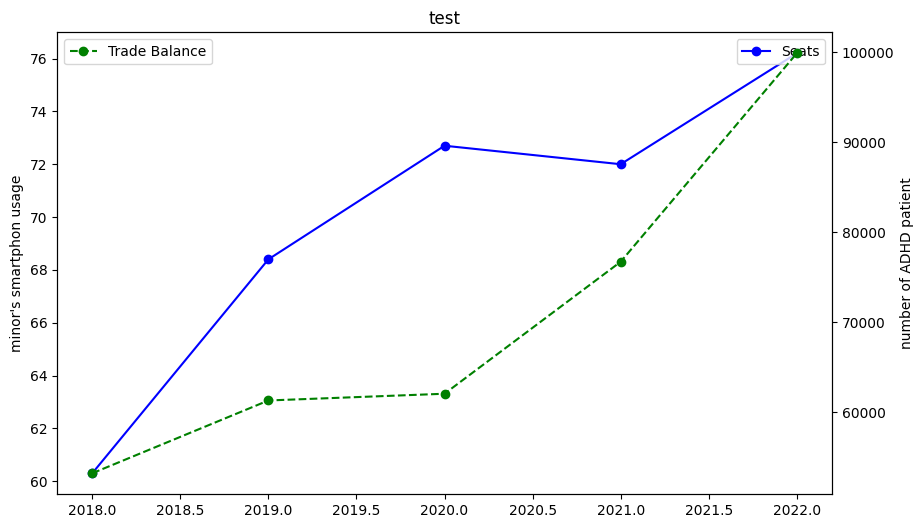

In [137]:
cellphone_useage = pd.read_csv('스마트폰_보유_여부18~22년도_20230915135135.csv').transpose()
# test.filter(regex='_a')
cellphone_useage = cellphone_useage.rename(columns=cellphone_useage.iloc[1])
cellphone_useage = cellphone_useage.drop(cellphone_useage.index[:2])
# cellphone_useage.replace(to_replace="-", value=0)
cellphone_useage.loc[['2018.1','2019.1','2020.1','2021.1','2022.1']]
minor = cellphone_useage.loc[['2018.1','2019.1','2020.1','2021.1','2022.1']]

minor = minor.replace('-',0)
minor = minor.astype({'만6-9세':'float64', '만10대미만':'float64', '만10-19세' : 'float64'})
minor['0-9세'] = minor['만6-9세'] + minor['만10대미만']
minor['미성년자'] = (minor['0-9세'] + minor['만10-19세'])/2
minor.rename(index={'2018.1':2018,'2019.1':2019,'2020.1':2020,'2021.1':2021,'2022.1':2022},inplace=True)

import matplotlib.pyplot as plt
import numpy as np

# 미성년자 스마트폰 보급률
plt.figure(figsize=(10, 6))
plt.plot(minor.index, minor['미성년자'], marker='o', label='Seats', linestyle='-', color='blue')
plt.ylabel("minor's smartphon usage")
plt.title("test")
plt.legend(loc='upper right')

# adhd 환자수
plt.twinx()
plt.plot(tmp.index, tmp['합계'], marker='o', label='Trade Balance', linestyle='--', color='green')
plt.ylabel('number of ADHD patient')
plt.legend(loc='upper left')

correlation_minor = minor['미성년자'].corr(tmp['합계'])
print(f'상관계수: {correlation_minor}')

In [3]:
app_useage = pd.read_csv('자주_이용하는_스마트기기_애플리케이션_이용_123순위(2018~2022) _20230915123923.csv',index_col=1).transpose().drop('구분별(1)')
# app_useage = app_useage.transpose()
app_useage.head(20)


구분별(2),구분별(2),남,여,만10대미만,만10-19세,만20-29세,만30-39세
2018,사례수 (명),4248.0,4053.0,119.0,876.6,1436.8,1395.5
2018.1,도서/만화(웹툰 포함) (%),13.9,12.1,31.1,28.3,24.4,14.4
2018.2,교육(인터넷 강의 사전/번역 학교 등) (%),2.8,2.9,9.1,7.8,6.7,1.4
2018.3,게임 (%),27.7,14.7,59.4,49.3,26.0,18.6
2018.4,금융거래/지출관리 (%),4.3,3.3,0.0,0.6,2.3,7.4
2018.5,쇼핑 (%),3.9,17.6,0.0,2.9,10.6,18.2
2018.6,생활정보/날씨 (%),10.8,11.2,3.6,1.5,4.4,10.3
2018.7,내비게이션/지리/위치/교통정보 (%),17.8,7.2,1.9,0.7,5.7,14.5
2018.8,뉴스 (%),27.2,16.9,1.9,2.5,8.9,23.6
2018.9,소셜네트워킹/커뮤니티 (%),15.8,21.1,5.1,24.1,31.1,21.4
